In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Balvi\OneDrive\Desktop\VG\student depression\Student Depression Dataset.csv")

In [3]:
print("Column Headings:")
print(df.columns.tolist())

Column Headings:
['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


In [4]:
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())

Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [5]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  int64  
 2   Academic Pressure                      27901 non-null  int64  
 3   Work Pressure                          27901 non-null  int64  
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  int64  
 6   Job Satisfaction                       27901 non-null  int64  
 7   Sleep Duration                         27901 non-null  object 
 8   Dietary Habits                         27901 non-null  object 
 9   Have you ever had suicidal thoughts ?  27901 non-null  object 
 10  Work/Study Hours                       27901 non-null  int64  
 11  Fi

In [7]:
df.dropna(inplace=True)

In [8]:
label_cols = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

In [9]:
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))  

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values   

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
import os
from sklearn.ensemble import (
    StackingClassifier, RandomForestClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)
from sklearn.linear_model import LogisticRegression

In [15]:
final_layer = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5,
                              subsample=0.8, colsample_bytree=0.8,
                              use_label_encoder=False, eval_metric='logloss', random_state=42)),
        #('sgd', SGDClassifier(max_iter=3000, tol=1e-3, random_state=42)),
        #('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
        #('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
        ('hgb', HistGradientBoostingClassifier(max_iter=300, learning_rate=0.1, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=12, max_features='sqrt', random_state=42)),
        #('et', ExtraTreesClassifier(n_estimators=100, max_depth=5, max_features=0.5, random_state=42)),
        ('lgbm', LGBMClassifier(n_estimators=150, learning_rate=0.05, max_depth=7, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True,
    n_jobs=-1
)

multi_layer_classifier = StackingClassifier(
    estimators=[
        ('ridge', RidgeClassifierCV()),
        ('logreg', LogisticRegression(max_iter=1000))
        #('mlp', MLPClassifier(hidden_layer_sizes=(250, 700, 100),
                              #max_iter=3000, activation='relu', solver='adam', alpha=0.01, random_state=42))
        #('svc', SVC(C=1, gamma=1e-3, kernel='rbf', probability=True)) 
    ],
    final_estimator=final_layer,
    passthrough=False,
    n_jobs=-1
)

multi_layer_classifier.fit(X_train, y_train)
y_pred = multi_layer_classifier.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8487455197132616
Precision: 0.8486899044080496
Recall: 0.8487455197132616
F1 Score: 0.8476109055350356


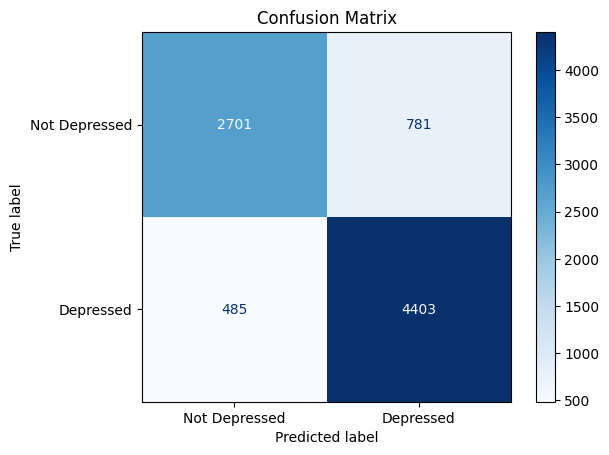

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Depressed', 'Depressed']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues) 
plt.title('Confusion Matrix')
plt.show()

In [18]:
import joblib
joblib.dump(multi_layer_classifier, "model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']